In [1]:
import os
import cv2
from lxml import etree
import matplotlib.pyplot as plt
import numpy as np

## Show one image

In [4]:
# file path
annotation_path = '/mnt/test_li/jst/echo-app/experiments/datasets/largeIntestine/raw/Annotations/20201110_fukushima_long.mp4#t=8.25.xml'
image_path = '/mnt/test_li/jst/echo-app/experiments/datasets/largeIntestine/raw/images/20201110_fukushima_long.mp4#t=8.25.jpg'

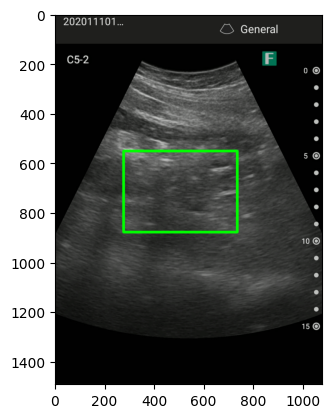

In [5]:
tree = etree.parse(annotation_path)
root = tree.getroot()
img = cv2.imread(image_path)

for obj in root.xpath("//object"):
    bndbox = obj.find("bndbox")

    xmin = int(float(bndbox.find("xmin").text))
    ymin = int(float(bndbox.find("ymin").text))
    xmax = int(float(bndbox.find("xmax").text))
    ymax = int(float(bndbox.find("ymax").text))

    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 10)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image using matplotlib
plt.imshow(img)
plt.show()

## Show all images

In [10]:
# folder path
annotation_path = '/mnt/test_li/jst/datasets/largeIntestine/raw/Annotations'
image_path = '/mnt/test_li/jst/datasets/largeIntestine/raw/JPEGImages'

In [24]:
# 'auto' or 'manual'
mode = 'auto'  
if mode == 'auto':
    wait_time = 1
# keep one output or save all output
keep_one_output = True 
if keep_one_output:
    from IPython.display import clear_output 

In [ ]:
for xml in os.listdir(annotation_path):
    xml_path = os.path.join(annotation_path, xml)
    tree = etree.parse(xml_path)
    root = tree.getroot()
    img_name = root.find(".//filename").text
    img = cv2.imread(os.path.join(image_path, img_name))

    for obj in root.xpath("//object"):
        bndbox = obj.find("bndbox")

        xmin = int(float(bndbox.find("xmin").text))
        ymin = int(float(bndbox.find("ymin").text))
        xmax = int(float(bndbox.find("xmax").text))
        ymax = int(float(bndbox.find("ymax").text))

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 10)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if keep_one_output:
        clear_output()
    # Show image using matplotlib
    plt.imshow(img)
    plt.show()

    if mode == 'auto':
        plt.pause(wait_time)
    elif mode == 'manual':
        input_string = input("Enter 'n' to continue or 'q' to quit: ")
        if input_string == 'q':
            break
        if input_string == 'n':
            continue

## Show one image using YOLO Format label

In [2]:
# file path
label_path = '/mnt/test_li/jst/echo-app/experiments/datasets/largeIntestine/splitName/exp0/val/labels/20201110_fukushima_long.mp4#t=8.25.txt'
image_path = '/mnt/test_li/jst/echo-app/experiments/datasets/largeIntestine/splitName/exp0/val/images/20201110_fukushima_long.mp4#t=8.25.jpg'

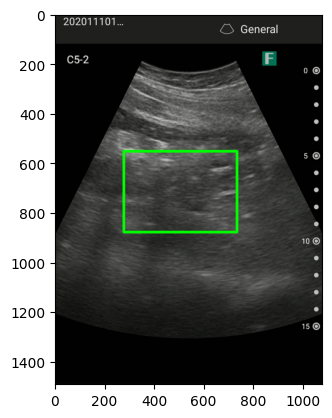

In [3]:
img = cv2.imread(image_path)
with open(label_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    data = line.split(" ")
    class_id = int(data[0])
    x = int(float(data[1]) * img.shape[1])
    y = int(float(data[2]) * img.shape[0])
    w = int(float(data[3]) * img.shape[1])
    h = int(float(data[4]) * img.shape[0])

    # Draw bounding box
    cv2.rectangle(img, (x - int(0.5*w), y - int(0.5*h)), (x + int(0.5*w), y + int(0.5*h)), (0, 255, 0), 10)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image using matplotlib
plt.imshow(img)
plt.show()